# Weather Station Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weatherdf = pd.read_excel('Updated-CWs for landfill leachate.xlsx', sheet_name = 0, header=2)

# drop empty first row of values
weatherdf.drop(weatherdf.index[0], inplace=True)


weatherdf.rename( columns={'Unnamed: 0':'Calendar Date'}, inplace=True )


#Checking to see if any columns have any missing values
bool_df = ~weatherdf.isna()
ps = bool_df.apply(any, axis = 1)
weatherdf = weatherdf[ps]
column_names = weatherdf.columns.to_list()
print('Columns that have missing values:')
for col_name in column_names:
    if(any(weatherdf[col_name].isna())):
        print(col_name+' has a missing value.')
print('End')


Columns that have missing values:
End


In [2]:
#Converting the rainfall from cumulative date to incremental data
weatherdf['Incremental Rainfall (inches)'] = weatherdf['Rain (inches)'].diff()

#Setting the starting value at zero
weatherdf.at[1, 'Incremental Rainfall (inches)']=0

#removing cumulative data from dataset for further calculations
weatherdf.drop("Rain (inches)", axis=1, inplace=True)

#Adding a column to show temperature in Celsius
weatherdf=weatherdf.assign(Outdoor_Temperature_Celsius = lambda x: (5/9)*x ['Outdoor Temperature (℉)']-32*5/9)
weatherdf=weatherdf.assign(Heat_Index_Celsius = lambda x: (5/9)*x ['Heat Index']-32*5/9)



In [3]:
#isolating the Day, Month, and Year for grouping

weatherdf=weatherdf.assign(Date=weatherdf['Calendar Date'].dt.date, Time=weatherdf['Calendar Date'].dt.time)


weatherdf['Date'] = weatherdf['Date'].astype(str)

weatherdf[['Year','Month','Day']] = weatherdf.Date.str.split('-',expand=True)

#Converting the Year, Month, and Day into integers
weatherdf['Year'] = weatherdf['Year'].astype(int)
weatherdf['Month'] = weatherdf['Month'].astype(int)
weatherdf['Day'] = weatherdf['Day'].astype(int)


## Daily Weather Station Summary Statistics (mean, min, max, standard deviation) for All Parameters

In [4]:
#convert Date (d) to integers
weatherdf.loc[:,['Date (d)']] = weatherdf.loc[:,['Date (d)']].round()
weatherdf['Date (d)'] = weatherdf['Date (d)'].astype(str)

#Incremental Rainfall Values would only show summary stastics for each time interval during the day not mean daily rainfall

#Grouping the data by date to find Daily Summary Statistics
meanweatherdf=weatherdf.groupby(weatherdf['Date']).mean()
minweatherdf=weatherdf.groupby(weatherdf['Date']).min()
maxweatherdf=weatherdf.groupby(weatherdf['Date']).max()
stdweatherdf=weatherdf.groupby(weatherdf['Date']).std()

#dropping duplicate date column for clarity
minweatherdf.drop("Calendar Date", axis=1, inplace=True)
maxweatherdf.drop("Calendar Date", axis=1, inplace=True)

#Making a seperate DataFrame for the daily rainfall values because summary stats for total daily values
#would not make sense in this context.
#total_daily_weatherdf is the sum of values for each day. I can extract the rainfall values for total daily rainfall
total_daily_raindf=weatherdf.groupby(weatherdf['Date']).sum()

total_daily_raindf.rename( columns={'Incremental Rainfall (inches)':'Rainfall_(inches)'}, inplace=True )


#drop additional columns
cols=[0,1,2,3,4,5,6,7,8,9,11,12,13]
total_daily_raindf.drop(total_daily_raindf.columns[cols], axis=1, inplace=True)
#Spliting the Date column into day month and year for future use
total_daily_raindf['Date2']=total_daily_raindf.index
total_daily_raindf[['Year','Month','Day']] = total_daily_raindf.Date2.str.split('-',expand=True)
total_daily_raindf.drop("Date2", axis=1, inplace=True)

# #removing the Rainfall column from the average, min, max, and standard deviation daily values because its meaningless 
# #in this context and would only show the summary statistics of rainfall per increment of time during the day

meanweatherdf.drop("Incremental Rainfall (inches)", axis=1, inplace=True)
minweatherdf.drop("Incremental Rainfall (inches)", axis=1, inplace=True)
maxweatherdf.drop("Incremental Rainfall (inches)", axis=1, inplace=True)
stdweatherdf.drop("Incremental Rainfall (inches)", axis=1, inplace=True)


print("................................................................................................")
print("It would be meaningless to calculate daily statistics for rainfall so these are total daily values")
print("................................................................................................")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Total Daily Rainfall")
print("_________________")
print(" ")
display(total_daily_raindf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("................................................................................................")
print("Weather Station Daily Summary Statistics (daily mean, min, max, standard deviation) for All Other Parameters")
print("................................................................................................")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Mean Daily Values")
print("_________________")
print(" ")
display(meanweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Daily Minumum Values")
print("____________________")
print(" ")
display(minweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Daily Maximum Values")
print("____________________")
print(" ")
display(maxweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Daily Standard Deviation of Values")
print("__________________________________")
print(" ")
display(stdweatherdf)
print("_________________________________________________________________________________________________")



................................................................................................
It would be meaningless to calculate daily statistics for rainfall so these are total daily values
................................................................................................
_________________________________________________________________________________________________


Total Daily Rainfall
_________________
 


,Rainfall_(inches),Month,Day,Year
Date,,,,
2020-09-27,0.00,09,27,2020
2020-09-28,0.00,09,28,2020
2020-09-29,0.00,09,29,2020
2020-09-30,0.00,09,30,2020
2020-10-01,0.00,10,01,2020
...,...,...,...,...
2021-08-23,0.00,08,23,2021
2021-08-24,0.01,08,24,2021
2021-08-25,0.00,08,25,2021


_________________________________________________________________________________________________



................................................................................................
Weather Station Daily Summary Statistics (daily mean, min, max, standard deviation) for All Other Parameters
................................................................................................

_________________________________________________________________________________________________


Mean Daily Values
_________________
 


,Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Year,Month,Day
Date,,,,,,,,,,,,,,,
2020-09-27,90.900000,68.000000,79.000000,107.000000,91.000000,29.920401,2.485485,3.106856,7.456454,270.0000,32.722222,41.666667,2020,9,27
2020-09-28,90.900000,68.000000,79.000000,107.000000,91.000000,29.893691,2.485485,3.106856,7.456454,270.0000,32.722222,41.666667,2020,9,28
2020-09-29,90.900000,68.000000,79.000000,107.000000,91.000000,29.883356,2.485485,3.106856,7.456454,270.0000,32.722222,41.666667,2020,9,29
2020-09-30,90.900000,68.000000,79.000000,107.000000,91.000000,30.016241,2.485485,3.106856,7.456454,270.0000,32.722222,41.666667,2020,9,30
2020-10-01,90.900000,68.000000,79.000000,107.000000,91.000000,29.987449,2.485485,3.106856,7.456454,270.0000,32.722222,41.666667,2020,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,81.280000,82.400000,74.725000,87.116667,81.308333,29.917069,1.278989,1.278989,4.758668,220.3125,27.377778,30.620370,2021,8,23
2021-08-24,83.070833,78.683333,75.041667,90.716667,83.066667,29.921006,1.082222,1.071865,3.780008,203.8125,28.372685,32.620370,2021,8,24
2021-08-25,85.716667,71.733333,74.400000,94.016667,85.775000,29.940939,1.734661,1.755374,5.084888,192.1875,29.842593,34.453704,2021,8,25


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Daily Minumum Values
____________________
 


,Date (d),Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Time,Year,Month,Day
Date,,,,,,,,,,,,,,,,,
2020-09-27,30.0,90.9,68.0,79.0,107.0,91.0,29.85481,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,03:12:00,2020,9,27
2020-09-28,31.0,90.9,68.0,79.0,107.0,91.0,29.85481,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,00:00:00,2020,9,28
2020-09-29,32.0,90.9,68.0,79.0,107.0,91.0,29.79575,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,00:00:00,2020,9,29
2020-09-30,33.0,90.9,68.0,79.0,107.0,91.0,29.97293,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,00:00:00,2020,9,30
2020-10-01,34.0,90.9,68.0,79.0,107.0,91.0,29.94340,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,00:00:00,2020,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,360.0,73.2,64.0,69.0,71.0,73.0,29.88434,0.000000,0.000000,0.000000,22.5,22.888889,21.666667,00:00:00,2021,8,23
2021-08-24,361.0,75.7,57.0,68.0,76.0,76.0,29.88434,0.000000,0.000000,0.000000,22.5,24.277778,24.444444,00:00:00,2021,8,24
2021-08-25,362.0,77.2,46.0,70.0,78.0,77.0,29.88434,0.000000,0.000000,0.000000,22.5,25.111111,25.555556,00:00:00,2021,8,25


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Daily Maximum Values
____________________
 


,Date (d),Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Time,Year,Month,Day
Date,,,,,,,,,,,,,,,,,
2020-09-27,31.0,90.9,68.0,79.0,107.0,91.0,29.97293,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,23:48:00,2020,9,27
2020-09-28,32.0,90.9,68.0,79.0,107.0,91.0,29.94340,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,23:48:00,2020,9,28
2020-09-29,33.0,90.9,68.0,79.0,107.0,91.0,29.97293,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,23:48:00,2020,9,29
2020-09-30,34.0,90.9,68.0,79.0,107.0,91.0,30.06152,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,23:48:00,2020,9,30
2020-10-01,35.0,90.9,68.0,79.0,107.0,91.0,30.03199,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,23:48:00,2020,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,361.0,95.7,92.0,81.0,120.0,96.0,29.94340,13.670170,14.291540,24.233480,337.5,35.388889,48.888889,23:48:00,2021,8,23
2021-08-24,362.0,99.7,90.0,83.0,128.0,100.0,29.97293,4.349598,3.728227,8.699197,360.0,37.611111,53.333333,23:48:00,2021,8,24
2021-08-25,363.0,100.4,86.0,80.0,118.0,100.0,30.00246,6.835083,4.349598,8.699197,360.0,38.000000,47.777778,23:48:00,2021,8,25


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Daily Standard Deviation of Values
__________________________________
 


,Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Year,Month,Day
Date,,,,,,,,,,,,,,,
2020-09-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.034170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-09-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.028644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-09-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.055071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-09-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.028631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.032029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,5.885727,8.203709,2.663045,12.664503,5.890879,0.020543,1.792772,1.746941,4.926713,69.695136,3.269848,7.035835,0.0,0.0,0.0
2021-08-24,6.517957,9.195343,3.403893,14.080312,6.453106,0.022968,1.076234,0.914796,1.644158,80.429495,3.621087,7.822395,0.0,0.0,0.0
2021-08-25,7.782596,12.458154,2.581121,13.546672,7.761641,0.035827,1.478565,1.212781,2.207536,65.607666,4.323664,7.525929,0.0,0.0,0.0


_________________________________________________________________________________________________


## Weather Station Monthly Summary Statistics (mean, min, max, standard deviation) for All Parameters

In [5]:
#Grouping the data by month to find Monthly Summary Statistics
#For min and max statistics, I can use the daily stats and group them by month
minmonthlyweatherdf=minweatherdf.groupby(minweatherdf['Month']).min()
maxmonthlyweatherdf=maxweatherdf.groupby(maxweatherdf['Month']).max()

#dropping duplicate date column for clarity
minmonthlyweatherdf.drop("Date (d)", axis=1, inplace=True)
maxmonthlyweatherdf.drop("Date (d)", axis=1, inplace=True)

#Mathematically it is incorrect to take the average of averages, So I am using the original DataFrame
#  #Grouping the data by Month to find Monthly Summary Statistics
meanmonthlyweatherdf=weatherdf.groupby(weatherdf['Month']).mean()
stdmonthlyweatherdf=weatherdf.groupby(weatherdf['Month']).std()


# #average rainfall in this dataframe is inaccurate because rainfall here is still incremental
# #I will remove the rainfall and add it back after finding it through the other dataframes
meanmonthlyweatherdf.drop("Incremental Rainfall (inches)", axis=1, inplace=True)
stdmonthlyweatherdf.drop("Incremental Rainfall (inches)", axis=1, inplace=True)


In [6]:
#I am seperately calculating the Monthly Rainfall and Standard Deviation because I have the daily rainfall in a different DataFrame
#Once again it seems meaningless to find monthly averages for rainfall since the data only spans one year.
#Instead I have shown the total rainfall for each month
totalmonthlyraindf=total_daily_raindf.groupby(total_daily_raindf['Month']).sum()
meandailyraindf=total_daily_raindf.groupby(total_daily_raindf['Month']).mean()
#standard deviation
stdmonthlyraindf=total_daily_raindf.groupby(total_daily_raindf['Month']).std()

#Min
minmonthlyraindf=total_daily_raindf.groupby(total_daily_raindf['Month']).min()

#Max
maxmonthlyraindf=total_daily_raindf.groupby(total_daily_raindf['Month']).max()


In [7]:
# # #I found the monthly rainfall and standard deviation seperately because you cant take the average of averages
print("................................................................................................")
print("Weather Station Monthly Summary Statistics (mean, min, max, standard deviation) for RainFall")
print("................................................................................................")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Average Daily Rainfall per Month")
print("_________________")
display(meandailyraindf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Total Monthly Rainfall")
print("_________________")
display(totalmonthlyraindf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Minimum Rainfall per Month")
print("_________________")
display(minmonthlyraindf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Maximum Rainfall per Month")
print("_________________")
display(maxmonthlyraindf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Standard Deviation of Rainfall per Month")
print("_________________")
display(stdmonthlyraindf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("................................................................................................")
print("Weather Station Monthly Summary Statistics (mean, min, max, standard deviation) for All Other Parameters")
print("................................................................................................")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Mean Values")
print("_________________")
display(meanmonthlyweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Minumum Values")
print("____________________")
display(minmonthlyweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Maximum Values")
print("____________________")
display(maxmonthlyweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Standard Deviation of Values")
print("__________________________________")
display(stdmonthlyweatherdf)
print("_________________________________________________________________________________________________")



................................................................................................
Weather Station Monthly Summary Statistics (mean, min, max, standard deviation) for RainFall
................................................................................................
_________________________________________________________________________________________________


Average Daily Rainfall per Month
_________________


,Rainfall_(inches)
Month,
01,0.156207
02,0.116429
03,0.027742
04,0.115000
05,0.016774
06,0.229000
07,0.423548
08,0.207778
09,0.000000


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Total Monthly Rainfall
_________________


,Rainfall_(inches)
Month,
01,4.53
02,3.26
03,0.86
04,3.45
05,0.52
06,6.87
07,13.13
08,5.61
09,0.00


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Minimum Rainfall per Month
_________________


,Rainfall_(inches),Day,Year
Month,,,
01,-0.40,03,2021
02,0.00,01,2021
03,0.00,01,2021
04,0.00,01,2021
05,0.00,01,2021
06,0.00,01,2021
07,0.00,01,2021
08,0.00,01,2021
09,0.00,27,2020


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Maximum Rainfall per Month
_________________


,Rainfall_(inches),Day,Year
Month,,,
01,3.96,31,2021
02,0.94,28,2021
03,0.58,31,2021
04,1.41,30,2021
05,0.27,31,2021
06,1.57,30,2021
07,2.20,31,2021
08,1.94,27,2021
09,0.00,30,2020


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Standard Deviation of Rainfall per Month
_________________


,Rainfall_(inches)
Month,
01,0.742608
02,0.249239
03,0.108065
04,0.317976
05,0.055940
06,0.383373
07,0.657969
08,0.436633
09,0.000000


_________________________________________________________________________________________________



................................................................................................
Weather Station Monthly Summary Statistics (mean, min, max, standard deviation) for All Other Parameters
................................................................................................

_________________________________________________________________________________________________


Monthly Mean Values
_________________


,Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Year,Day
Month,,,,,,,,,,,,,,
1,61.138306,76.106389,52.409144,61.922040,60.935229,30.003914,3.609307,3.653743,7.520740,155.165592,16.187948,16.623355,2021.0,17.279015
2,67.586905,77.664583,59.177083,67.030952,67.280952,29.964932,4.308728,4.344790,8.940903,173.337054,19.770503,19.461640,2021.0,14.500000
3,70.464684,73.064872,60.016420,71.197577,70.387887,30.014065,3.612316,3.589569,7.823256,175.348587,21.369269,21.776432,2021.0,16.008075
4,73.545944,70.772500,61.792500,74.005833,73.508056,29.920793,3.377325,3.387163,7.595400,182.075000,23.081080,23.336574,2021.0,15.500000
5,79.526156,65.907527,65.456989,81.205108,79.577688,29.980360,3.201732,3.221943,7.538135,178.524194,26.403420,27.336171,2021.0,16.000000
6,82.021917,75.527500,72.294444,85.813333,82.067222,29.945475,2.522940,2.541753,6.546318,202.743750,27.789954,29.896296,2021.0,15.500000
7,83.025780,78.439247,74.625000,89.166398,83.078763,29.963650,2.266669,2.313940,6.018448,194.606855,28.347655,31.759110,2021.0,16.000000
8,83.451578,79.213068,75.378788,90.727273,83.481376,29.945954,2.008669,2.027498,5.606267,198.117898,28.584210,32.626263,2021.0,13.704545
9,90.900000,68.000000,79.000000,107.000000,91.000000,29.928699,2.485485,3.106856,7.456454,270.000000,32.722222,41.666667,2020.0,28.551724


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Minumum Values
____________________


,Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Time,Year,Day
Month,,,,,,,,,,,,,,,
1,41.0,27.0,36.0,41.0,37.0,29.70716,0.000000,0.000000,0.000000,22.5,5.000000,5.000000,00:00:00,2021,3
2,38.7,19.0,28.0,39.0,37.0,29.70716,0.000000,0.000000,0.000000,22.5,3.722222,3.888889,00:00:00,2021,1
3,46.2,27.0,36.0,46.0,43.0,29.76622,0.000000,0.000000,0.000000,22.5,7.888889,7.777778,00:00:00,2021,1
4,45.9,22.0,32.0,46.0,42.0,29.58904,0.000000,0.000000,0.000000,22.5,7.722222,7.777778,00:00:00,2021,1
5,60.6,25.0,46.0,61.0,61.0,29.79575,0.000000,0.000000,0.000000,22.5,15.888889,16.111111,00:00:00,2021,1
6,69.4,34.0,62.0,65.0,69.0,29.73669,0.000000,0.000000,0.000000,22.5,20.777778,18.333333,00:00:00,2021,1
7,72.5,43.0,68.0,68.0,73.0,29.76622,0.000000,0.000000,0.000000,22.5,22.500000,20.000000,00:00:00,2021,1
8,72.0,42.0,67.0,66.0,72.0,29.79575,0.000000,0.000000,0.000000,22.5,22.222222,18.888889,00:00:00,2021,1
9,90.9,68.0,79.0,107.0,91.0,29.79575,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,00:00:00,2020,27


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Maximum Values
____________________


,Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Time,Year,Day
Month,,,,,,,,,,,,,,,
1,85.6,99.0,71.0,89.0,86.0,30.26823,19.262510,17.398390,25.476220,360.0,29.777778,31.666667,23:48:00,2021,31
2,93.9,99.0,75.0,100.0,94.0,30.23870,22.369360,21.126620,28.583070,360.0,34.388889,37.777778,23:48:00,2021,28
3,97.5,98.0,74.0,107.0,98.0,30.38635,18.019760,16.155650,23.612100,360.0,36.388889,41.666667,23:48:00,2021,31
4,100.2,99.0,74.0,104.0,100.0,30.26823,23.612100,23.612100,38.525010,360.0,37.888889,40.000000,23:48:00,2021,30
5,101.5,95.0,76.0,110.0,102.0,30.17964,16.155650,15.534280,21.747990,360.0,38.611111,43.333333,23:48:00,2021,31
6,105.3,98.0,78.0,116.0,105.0,30.09105,18.019760,16.155650,22.369360,360.0,40.722222,46.666667,23:48:00,2021,30
7,103.6,98.0,81.0,126.0,104.0,30.12058,14.912910,11.806050,21.747990,360.0,39.777778,52.222222,23:48:00,2021,31
8,106.2,98.0,83.0,133.0,104.0,30.09105,19.883880,17.398390,35.418160,360.0,41.222222,56.111111,23:48:00,2021,27
9,90.9,68.0,79.0,107.0,91.0,30.06152,2.485485,3.106856,7.456454,270.0,32.722222,41.666667,23:48:00,2020,30


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Standard Deviation of Values
__________________________________


,Outdoor Temperature (℉),Outdoor Humidity (%),Dew Point,Heat Index,Wind Chill,Barometric Pressure (inHg),Wind Speed (mph),Wind Average (mph),Peak Wind (mph),Wind Direction,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Year,Day
Month,,,,,,,,,,,,,,
1,9.328342,15.764653,7.967996,10.486205,9.586262,0.106806,2.991612,2.838621,4.471193,98.567531,5.182412,5.825670,0.0,8.211624
2,11.016782,16.536868,10.781210,12.180209,11.589418,0.107834,3.768803,3.622008,5.697167,96.842207,6.120434,6.766783,0.0,8.078950
3,10.638731,16.877153,7.995051,12.026010,10.831754,0.134783,2.975937,2.738573,4.456932,94.492984,5.910406,6.681117,0.0,8.948783
4,10.093759,19.010509,7.562980,11.079130,10.302345,0.124194,2.887064,2.644409,4.342761,98.574780,5.607644,6.155072,0.0,8.656644
5,9.073122,17.554388,5.042842,10.909371,9.079221,0.083482,2.653238,2.422563,4.111126,92.035496,5.040623,6.060762,0.0,8.945474
6,7.414212,15.342069,2.335674,11.902173,7.411602,0.066689,2.442071,2.247926,4.005195,87.873175,4.119007,6.612318,0.0,8.656644
7,6.912022,13.356532,1.936604,12.328828,6.910676,0.078193,2.316877,2.154987,3.754307,92.061525,3.840012,6.849349,0.0,8.945474
8,7.102214,12.588646,2.297667,13.535512,7.063001,0.057688,2.105929,1.924132,3.800600,87.332539,3.945674,7.519729,0.0,7.624671
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.065674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.102480


_________________________________________________________________________________________________


## Weather Station Overall Summary Statistics (mean, min, max, standard deviation) for All Parameters

In [8]:
#Grouping the data by month to find Monthly Summary Statistics
weathercopy=weatherdf.copy()
# Dropping unneeded columns
cols2=[1,12,13,14,15,16,17]
weathercopy.drop(weathercopy.columns[cols2], axis=1, inplace=True)

#Finding the summary stats for each value except rainfall
meanweatherdf=weathercopy.mean()
minweatherdf=weathercopy.min()
maxweatherdf=weathercopy.max()
stdweatherdf=weathercopy.std()

In [9]:
#Finding Overall Summary Stats for Daily Rainfall from total_daily_raindf
total_daily_raindf2=total_daily_raindf.copy()
total_daily_raindf2.drop(['Year','Month','Day'], axis=1, inplace=True)
# total_daily_raindf2.head()

In [10]:
print("................................................................................................")
print("Overall Weather Station Monthly Summary Statistics (mean, min, max, standard deviation) for RainFall")
print("................................................................................................")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Average Daily Rainfall")
print("_________________")
display(total_daily_raindf2.mean())
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Minimum Daily Rainfall")
print("_________________")
display(total_daily_raindf2.min())
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Maximum Daily Rainfall")
print("_________________")
display(total_daily_raindf2.max())
print("_________________________________________________________________________________________________")
print("")
print("")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Standard Deviation of Daily Rainfall")
print("_________________")
display(total_daily_raindf2.std())
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("................................................................................................")
print("Weather Station Overall Summary Statistics (mean, min, max, standard deviation) for All Parameters")
print("................................................................................................")
print("")
print("_________________________________________________________________________________________________")
print("")
print("")
print("Overall Mean Values")
print("_________________")
print(" ")
display(meanweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Overall Minumum Values")
print("____________________")
print(" ")
display(minweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Overall Maximum Values")
print("____________________")
print(" ")
display(maxweatherdf)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Overall Standard Deviation of Values")
print("__________________________________")
print(" ")
display(stdweatherdf)
print("_________________________________________________________________________________________________")



................................................................................................
Overall Weather Station Monthly Summary Statistics (mean, min, max, standard deviation) for RainFall
................................................................................................
_________________________________________________________________________________________________


Average Daily Rainfall
_________________


Rainfall_(inches)    0.161034
dtype: float64

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Minimum Daily Rainfall
_________________


Rainfall_(inches)   -3.59
dtype: float64

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Maximum Daily Rainfall
_________________


Rainfall_(inches)    8.0
dtype: float64

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Standard Deviation of Daily Rainfall
_________________


Rainfall_(inches)    0.692934
dtype: float64

_________________________________________________________________________________________________



................................................................................................
Weather Station Overall Summary Statistics (mean, min, max, standard deviation) for All Parameters
................................................................................................

_________________________________________________________________________________________________


Overall Mean Values
_________________
 


Outdoor Temperature (℉)        75.519961
Outdoor Humidity (%)           74.294207
Dew Point                      65.530480
Heat Index                     78.688597
Wind Chill                     75.463788
Barometric Pressure (inHg)     29.966772
Wind Speed (mph)                3.077132
Wind Average (mph)              3.132494
Peak Wind (mph)                 7.197415
Wind Direction                185.162947
Month                           5.571304
Day                            15.442809
dtype: float64

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Overall Minumum Values
____________________
 


Calendar Date                 2020-09-27 03:12:00
Outdoor Temperature (℉)                      37.8
Outdoor Humidity (%)                           19
Dew Point                                      28
Heat Index                                     38
Wind Chill                                     35
Barometric Pressure (inHg)                 29.589
Wind Speed (mph)                                0
Wind Average (mph)                              0
Peak Wind (mph)                                 0
Wind Direction                               22.5
Month                                           1
Day                                             1
dtype: object

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Overall Maximum Values
____________________
 


Calendar Date                 2021-08-27 09:24:00
Outdoor Temperature (℉)                     106.2
Outdoor Humidity (%)                           99
Dew Point                                      83
Heat Index                                    133
Wind Chill                                    105
Barometric Pressure (inHg)                30.3864
Wind Speed (mph)                          23.6121
Wind Average (mph)                        23.6121
Peak Wind (mph)                            38.525
Wind Direction                                360
Month                                          12
Day                                            31
dtype: object

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Overall Standard Deviation of Values
__________________________________
 


Outdoor Temperature (℉)       12.261045
Outdoor Humidity (%)          15.994072
Dew Point                     10.581955
Heat Index                    16.536419
Wind Chill                    12.480935
Barometric Pressure (inHg)     0.101321
Wind Speed (mph)               2.811773
Wind Average (mph)             2.627396
Peak Wind (mph)                4.307452
Wind Direction                93.060523
Month                          3.111261
Day                            9.040211
dtype: float64

_________________________________________________________________________________________________


# Raw Leachate Quality Data

In [11]:
leachatedf = pd.read_excel('Updated-CWs for landfill leachate.xlsx', sheet_name = 1, header=2)

display(leachatedf.head())

bool_df = ~leachatedf.isna()
ps = bool_df.apply(any, axis = 1)
leachatedf = leachatedf[ps]
column_names = leachatedf.columns.to_list()
print('Columns that have missing values:')
for col_name in column_names:
    if(any(leachatedf[col_name].isna())):
        print(col_name+' has a missing value.')
print('End')

,Time (d),pH,Alkalinity (mg/L as CaCO₃ ),Conductivity (µS/cm),sCOD (mg/L),Color as UV 456 absorbence,NH₄⁺-N (mg/L),Free NH₄⁺-N (mg/L),NO₂⁻-N (mg/L),NO₃⁻-N (mg/L)
0,54,8.695,1330.0,17.355,395.0,0.120,282.042090,61.861299,4.71599,0.000000
1,60,7.975,2010.0,17.735,455.0,0.098,354.827352,18.030885,0.98523,0.000000
2,68,7.805,2430.0,18.220,460.0,0.114,376.868748,13.162963,0.00000,0.000000
3,88,7.815,1170.0,12.735,275.0,0.088,222.821748,7.958166,0.00000,2.973102
4,97,7.815,1170.0,13.500,335.0,0.094,243.845616,13.229366,0.00000,0.000000


Columns that have missing values:
Alkalinity (mg/L as CaCO₃ ) has a missing value.
sCOD (mg/L) has a missing value.
End


In [12]:
#Need to rename Alkalinity_(mg/L_as_CaCO₃_) so that it does not include subscript
#To do this I copied the dataframe to use the data, while keeping the original
#Dataframe column labels the same
copydf=leachatedf.copy()
# copydf
copydf.columns = [c.replace(' ', '_') for c in copydf.columns]


In [13]:
#Renamed the columns on the duplicate dataframe in order to avoid the subscript issues

copydf.columns = ['col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8','col_9','col_10']


In [14]:
Alkalinity = len(copydf.col_3.unique().tolist())
sCOD = len(copydf.col_5.unique().tolist())

print('Alkalinity_(mg/L_as_CaCO₃_) has '+str(Alkalinity)+' different values.')
print('sCOD (mg/L) has '+str(sCOD)+' different values.')


Alkalinity_(mg/L_as_CaCO₃_) has 34 different values.
sCOD (mg/L) has 24 different values.


In [15]:
#These columns have many different values. I filled missing values from this column according to the following ad-hoc imputation technique: 
#A random value withdrawn from the set (mean - standard deviation, mean + standard deviation).

na_Alkalinity = copydf.col_3.isna()
#mean and std of all ages
mean_Alkalinity = copydf.col_3.mean()
std_Alkalinity = copydf.col_3.std()
#how many NaNs
size_na_Alkalinity = sum(na_Alkalinity)

#Using Numpy package to randomly withdraw integer values from the given range 
#(mean - standard deviation, mean + standard deviation) as many as size
import numpy as np
#randint() gives an array which can be inserted in Pandas series
ps_rand_Alkalinity_array = np.random.randint(max(0, mean_Alkalinity - std_Alkalinity), mean_Alkalinity + std_Alkalinity, size = size_na_Alkalinity)
ps_rand_Alkalinity_array = ps_rand_Alkalinity_array.astype(float)#currently the column is of type float
#Only replace for those NaNs.

copydf.loc[na_Alkalinity, 'col_3'] = ps_rand_Alkalinity_array

########
#repeat for sCOD

na_sCOD = copydf.col_5.isna()

mean_sCOD = copydf.col_5.mean()
std_sCOD = copydf.col_5.std()

size_na_sCOD = sum(na_sCOD)

import numpy as np

ps_rand_sCOD_array = np.random.randint(max(0, mean_sCOD - std_sCOD), mean_sCOD + std_sCOD, size = size_na_sCOD)
ps_rand_sCOD_array = ps_rand_sCOD_array.astype(float)#currently the column is of type float

copydf.loc[na_sCOD, 'col_5'] = ps_rand_sCOD_array


In [16]:
#Adding new values back into the original DataFrame to complete Summary Statistics
leachatedf['Alkalinity (mg/L as CaCO₃ )']=copydf['col_3']
leachatedf['sCOD (mg/L)']=copydf['col_5']
# leachatedf

#Rechecking for missing data

bool_df = ~leachatedf.isna()
ps = bool_df.apply(any, axis = 1)
leachatedf = leachatedf[ps]
column_names = leachatedf.columns.to_list()
print('Columns that have missing values:')
for col_name in column_names:
    if(any(leachatedf[col_name].isna())):
        print(col_name+' has a missing value.')
print('End')

Columns that have missing values:
End


In [17]:
print("................................................................................................")
print("Raw Leachate Quality Summary Statistics ( mean, min, max, standard deviation) for all parameters")
print("................................................................................................")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Daily mean values")
print("_________________")
print(" ")
display(leachatedf.mean())
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Daily minumum values")
print("____________________")
print(" ")
display(leachatedf.min())
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Daily maximum values")
print("____________________")
print(" ")
display(leachatedf.max())
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Daily standard deviation of values")
print("__________________________________")
print(" ")
display(leachatedf.std())
print("_________________________________________________________________________________________________")

................................................................................................
Raw Leachate Quality Summary Statistics ( mean, min, max, standard deviation) for all parameters
................................................................................................

_________________________________________________________________________________________________


Daily mean values
_________________
 


Time (d)                        208.368421
pH                                7.970789
Alkalinity (mg/L as CaCO₃ )    2309.171053
Conductivity (µS/cm)             16.597500
sCOD (mg/L)                     473.052632
Color as UV 456 absorbence        0.127888
NH₄⁺-N (mg/L)                   366.089246
Free NH₄⁺-N (mg/L)               19.653826
NO₂⁻-N (mg/L)                     0.272884
NO₃⁻-N (mg/L)                     1.794016
dtype: float64

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Daily minumum values
____________________
 


Time (d)                         54.000000
pH                                7.615000
Alkalinity (mg/L as CaCO₃ )    1170.000000
Conductivity (µS/cm)             12.300000
sCOD (mg/L)                     275.000000
Color as UV 456 absorbence        0.068500
NH₄⁺-N (mg/L)                   222.821748
Free NH₄⁺-N (mg/L)                7.958166
NO₂⁻-N (mg/L)                    -0.007840
NO₃⁻-N (mg/L)                     0.000000
dtype: float64

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Daily maximum values
____________________
 


Time (d)                        358.000000
pH                                8.695000
Alkalinity (mg/L as CaCO₃ )    3195.000000
Conductivity (µS/cm)             19.305000
sCOD (mg/L)                     565.000000
Color as UV 456 absorbence        0.196000
NH₄⁺-N (mg/L)                   478.569546
Free NH₄⁺-N (mg/L)               61.861299
NO₂⁻-N (mg/L)                     4.715990
NO₃⁻-N (mg/L)                    41.947601
dtype: float64

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Daily standard deviation of values
__________________________________
 


Time (d)                        89.342167
pH                               0.182667
Alkalinity (mg/L as CaCO₃ )    473.261146
Conductivity (µS/cm)             1.693323
sCOD (mg/L)                     58.390668
Color as UV 456 absorbence       0.030677
NH₄⁺-N (mg/L)                   57.138047
Free NH₄⁺-N (mg/L)               9.543467
NO₂⁻-N (mg/L)                    0.946489
NO₃⁻-N (mg/L)                    6.888715
dtype: float64

_________________________________________________________________________________________________


# 30 Year PRISM Data

In [18]:
prismdf = pd.read_csv('PRISM_ppt_tmean_stable_4km_19910301_20210301_27.7663_-82.2093.csv', header=10)

In [19]:
#Checking for any missing data points
bool_df = ~prismdf.isna()
ps = bool_df.apply(any, axis = 1)
prismdf = prismdf[ps]
column_names = prismdf.columns.to_list()
print('Columns that have missing values:')
for col_name in column_names:
    if(any(prismdf[col_name].isna())):
        print(col_name+' has a missing value.')
print('End')

Columns that have missing values:
End


In [20]:
#Adding a column converting temp to C
prismdf=prismdf.assign(Celsius = lambda x: (5/9)*x ['tmean (degrees F)']-32*5/9)
#I split the Date column into Year, Month, and Day so that grouping the data for summary statistics will be easier
prismdf[['Year','Month','Day']] = prismdf.Date.str.split('-',expand=True)

In [21]:
print(prismdf.loc[[10537]])


             Date  ppt (inches)  tmean (degrees F)    Celsius  Year Month Day
10537  2020-01-05          0.51               61.6  16.444444  2020    01  05


## PRISM Monthly Summary Statistics for Each Year

In [22]:
#Grouping the data to find Monthly Summary Statistics for Each Year

prism_month_by_year_mean=prismdf.groupby(['Year', 'Month']).mean()

prism_month_by_year_min=prismdf.groupby(['Year', 'Month']).min()

#dropping Date Column for clearer data
prism_month_by_year_min.drop("Date", axis=1, inplace=True)

prism_month_by_year_max=prismdf.groupby(['Year', 'Month']).max()
prism_month_by_year_max.drop("Date", axis=1, inplace=True)
# prism_month_by_year_mean.drop("ppt (inches)", axis=1, inplace=True)

prism_month_by_year_std=prismdf.groupby(['Year', 'Month']).std()

In [23]:
# meanforwateronlydf2=prismdf.copy()
# meanforwateronlydf2=meanforwateronlydf2.groupby(['Year','Month']).sum()

# # #Extracting the Rainfall average and standard deviation to add them into the correct dataframe
# # #For these I only need the single column in the dataframes

# extracted_col_mean2 = meanforwateronlydf2['ppt (inches)'].tolist()

# # # extracted_col_std = stdforwateronlydf['ppt (inches)'].tolist()

# #Adding the adjusted correct values back into the mean and standard deviation dataframes
# prism_month_by_year_mean['ppt (inches)']=extracted_col_mean2


In [24]:
print("................................................................................................")
print("PRISM Monthly Summary Statistics for Each Year (daily mean, min, max, standard deviation) for All Parameters")
print("................................................................................................")
print("")



print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Mean Values by Year")
print("_________________")
print(" ")
display(prism_month_by_year_mean)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Minimum Values by Year")
print("____________________")
print(" ")
display(prism_month_by_year_min)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Maximum Values by Year")
print("____________________")
print(" ")
display(prism_month_by_year_max)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Standard Deviation Values by Year")
print("__________________________________")
print(" ")
display(prism_month_by_year_std)
print("_________________________________________________________________________________________________")


................................................................................................
PRISM Monthly Summary Statistics for Each Year (daily mean, min, max, standard deviation) for All Parameters
................................................................................................

_________________________________________________________________________________________________


Monthly Mean Values by Year
_________________
 


ppt (inches)  tmean (degrees F)    Celsius
Year Month                                            
1991 03         0.143226          67.554839  19.752688
     04         0.154667          74.620000  23.677778
     05         0.234839          79.429032  26.349462
     06         0.195000          80.243333  26.801852
     07         0.323548          81.500000  27.500000
...                  ...                ...        ...
2020 11         0.215000          71.996667  22.220370
     12         0.118065          58.564516  14.758065
2021 01         0.021935          60.238710  15.688172
     02         0.127857          66.167857  18.982143
     03         0.000000          77.000000  25.000000

[361 rows x 3 columns]

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Minimum Values by Year
____________________
 


ppt (inches)  tmean (degrees F)    Celsius Day
Year Month                                                
1991 03              0.0               50.2  10.111111  01
     04              0.0               60.8  16.000000  01
     05              0.0               76.8  24.888889  01
     06              0.0               73.1  22.833333  01
     07              0.0               76.1  24.500000  01
...                  ...                ...        ...  ..
2020 11              0.0               62.8  17.111111  01
     12              0.0               43.8   6.555556  01
2021 01              0.0               48.8   9.333333  01
     02              0.0               46.4   8.000000  01
     03              0.0               77.0  25.000000  01

[361 rows x 4 columns]

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Maximum Values by Year
____________________
 


ppt (inches)  tmean (degrees F)    Celsius Day
Year Month                                                
1991 03             1.10               77.0  25.000000  31
     04             1.58               82.7  28.166667  30
     05             1.65               81.8  27.666667  31
     06             0.85               83.2  28.444444  30
     07             1.20               83.6  28.666667  31
...                  ...                ...        ...  ..
2020 11             5.17               79.3  26.277778  30
     12             1.51               69.7  20.944444  31
2021 01             0.37               74.7  23.722222  31
     02             0.85               77.6  25.333333  28
     03             0.00               77.0  25.000000  01

[361 rows x 4 columns]

_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Standard Deviation Values by Year
__________________________________
 


ppt (inches)  tmean (degrees F)   Celsius
Year Month                                           
1991 03         0.273537           7.163465  3.979703
     04         0.323182           4.998786  2.777103
     05         0.395279           1.390730  0.772628
     06         0.231140           2.309005  1.282781
     07         0.315421           1.599375  0.888542
...                  ...                ...       ...
2020 11         0.943002           4.703886  2.613270
     12         0.311314           7.483339  4.157411
2021 01         0.071806           7.210810  4.006006
     02         0.258720           8.482053  4.712252
     03              NaN                NaN       NaN

[361 rows x 3 columns]

_________________________________________________________________________________________________


## Prism Monthly Summary Statistics Regardless of Year

In [25]:
#Grouping the data to find Monthly Summary Statistics Regardless of Year

prism_month_mean=prismdf.groupby(['Month']).mean()
prism_month_mean.drop("ppt (inches)", axis=1, inplace=True)

meanforwateronlydf3=prismdf.copy()
meanforwateronlydf3=meanforwateronlydf3.groupby(['Month']).sum()

# #Extracting the Rainfall average and standard deviation to add them into the correct dataframe
# #For these I only need the single column in the dataframes

extracted_col_mean3 = meanforwateronlydf3['ppt (inches)'].tolist()

# extracted_col_mean3=(extracted_col_mean3)/30
extracted_col_mean3  = np.divide(extracted_col_mean3, 30)

# # extracted_col_std = stdforwateronlydf['ppt (inches)'].tolist()

#Adding the adjusted correct values back into the mean and standard deviation dataframes
prism_month_mean['ppt (inches)']=extracted_col_mean3


prism_month_min=prismdf.groupby(['Month']).min()
prism_month_min.drop("Date", axis=1, inplace=True)
prism_month_min.drop("Year", axis=1, inplace=True)
prism_month_min.drop("Day", axis=1, inplace=True)


prism_month_max=prismdf.groupby(['Month']).max()
prism_month_max.drop("Date", axis=1, inplace=True)
prism_month_max.drop("Year", axis=1, inplace=True)
prism_month_max.drop("Day", axis=1, inplace=True)

prism_month_std=prismdf.groupby(['Month']).std()


print("................................................................................................")
print("PRISM Monthly Summary Statistics Regardless of Year (daily mean, min, max, standard deviation) for All Parameters")
print("................................................................................................")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Mean Values")
print("_________________")
print(" ")
display(prism_month_mean)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Minimum Values")
print("____________________")
print(" ")
display(prism_month_min)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Maximum Values")
print("____________________")
print(" ")
display(prism_month_max)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")

print("_________________________________________________________________________________________________")
print("")
print("")
print("Monthly Standard Deviation Values")
print("__________________________________")
print(" ")
display(prism_month_std)
print("_________________________________________________________________________________________________")


................................................................................................
PRISM Monthly Summary Statistics Regardless of Year (daily mean, min, max, standard deviation) for All Parameters
................................................................................................

_________________________________________________________________________________________________


Monthly Mean Values
_________________
 


,tmean (degrees F),Celsius,ppt (inches)
Month,,,
01,59.956452,15.531362,2.594667
02,63.062500,17.256944,2.094333
03,66.345650,19.080917,2.799333
04,71.256444,21.809136,2.796333
05,76.479785,24.710992,3.150333
06,80.621111,27.011728,8.675667
07,81.770538,27.650299,8.550667
08,82.028387,27.793548,8.286333
09,80.516111,26.953395,7.049000


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Minimum Values
____________________
 


,ppt (inches),tmean (degrees F),Celsius
Month,,,
01,0.0,31.2,-0.444444
02,0.0,38.1,3.388889
03,0.0,43.0,6.111111
04,0.0,50.0,10.000000
05,0.0,59.0,15.000000
06,0.0,69.8,21.000000
07,0.0,74.8,23.777778
08,0.0,73.7,23.166667
09,0.0,71.0,21.666667


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Maximum Values
____________________
 


,ppt (inches),tmean (degrees F),Celsius
Month,,,
01,3.51,77.9,25.500000
02,2.19,78.0,25.555556
03,3.94,80.9,27.166667
04,3.26,83.7,28.722222
05,2.95,84.8,29.333333
06,4.96,89.5,31.944444
07,4.32,86.7,30.388889
08,2.85,86.1,30.055556
09,6.71,86.1,30.055556


_________________________________________________________________________________________________



_________________________________________________________________________________________________


Monthly Standard Deviation Values
__________________________________
 


,ppt (inches),tmean (degrees F),Celsius
Month,,,
01,0.283292,8.570222,4.761234
02,0.237391,8.103421,4.501901
03,0.311886,7.051532,3.917518
04,0.310337,5.373897,2.985498
05,0.293950,3.858652,2.143695
06,0.493356,2.313432,1.285240
07,0.415957,1.775583,0.986435
08,0.400403,1.729068,0.960594
09,0.519602,2.223711,1.235395


_________________________________________________________________________________________________


## Weather Station and PRISM Comparison

In [26]:
#Removing spaces to make the code easier
prism_month_mean.columns = [c.replace(' ', '_') for c in prism_month_mean.columns]

In [27]:
#Adding the PRISM Column to the compare dataframe
extracted_col = totalmonthlyraindf['Rainfall_(inches)'].tolist()
extracted_col2 = prism_month_mean['ppt_(inches)'].tolist()

In [28]:
comparedf=pd.DataFrame()


In [29]:
comparedf['Weather_Station_Monthly_Average_Rainfall_(inches))']= extracted_col
comparedf['PRISM_Monthly_Average_Rainfall_(inches)']=extracted_col2
comparedf.index +=1
display(comparedf)

,Weather_Station_Monthly_Average_Rainfall_(inches)),PRISM_Monthly_Average_Rainfall_(inches)
1,4.53,2.594667
2,3.26,2.094333
3,0.86,2.799333
4,3.45,2.796333
5,0.52,3.150333
6,6.87,8.675667
7,13.13,8.550667
8,5.61,8.286333
9,0.00,7.049000
10,1.71,2.711000


In [30]:
comparedf

,Weather_Station_Monthly_Average_Rainfall_(inches)),PRISM_Monthly_Average_Rainfall_(inches)
1,4.53,2.594667
2,3.26,2.094333
3,0.86,2.799333
4,3.45,2.796333
5,0.52,3.150333
6,6.87,8.675667
7,13.13,8.550667
8,5.61,8.286333
9,0.00,7.049000
10,1.71,2.711000


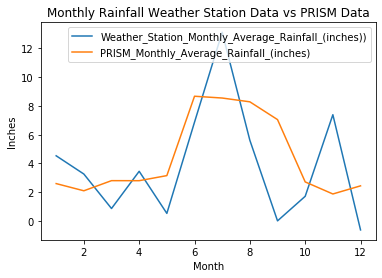

In [31]:
axxx=comparedf.plot()
axxx.set_xlabel('Month')
axxx.set_ylabel('Inches')
axxx.set_title('Monthly Rainfall Weather Station Data vs PRISM Data')
plt.show()

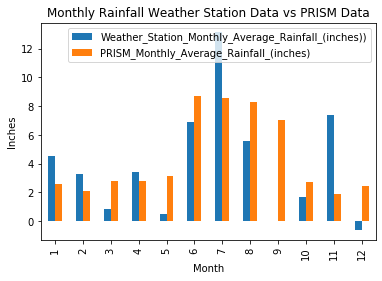

In [32]:
ax = comparedf.plot.bar()#, colormap=cmap)

ax.set_xlabel('Month')
ax.set_ylabel('Inches')
ax.set_title('Monthly Rainfall Weather Station Data vs PRISM Data')

plt.show()

#### 2.	The data collected from the weather station seems to be closely correlated with the PRISM data collected over thirty years. The most notable differences are that the weather station seems to be less smooth, and has larger spikes in the data. I think this can be attributed to a couple of different factors. The first being that the PRISM data was monthly data that was averaged over a period of 30 years, as opposed to a single years worth of data. This leads to more outliers in the weather station data. There were two months in particular that seemed to differ the most between the weather station data and the PRISM data, September and November. The discrepancy seen in the September data can be attributed to there only being a few days worth of data for the weather station data, opposed to 30 years for PRISM. This lead to almost zero recorded rainfall for September by the weather station. The weather station also showed an unusually large spike in Novembers rain, which I believe could be attributed to Hurricane Eta, which brought a lot of rain to Florida in November 2020. 

## Estimated Monthly Evapotranspiration (ET) Rates

In [33]:
#I used the Thornthwaite Equation and applied it to the meanmonthlyweatherdf DataFrame
# to make a new column of calculated ET values

#Defining a function that calculated the Thornthwaite Equation
def evapo(T, I):
    a=(0.675*(I**3) - 77.1*(I**2) + 17920*I + 492390)*(0.000001)
    E=16.0*(((10.0*T)/I)**((0.675*(I**3) - 77.1*(I**2) + 17920*I + 492390)*(0.000001)))
    return E

#Making a copy of the mean dataframe and removing unneeded columns
evapotranspirationdf=meanmonthlyweatherdf.copy()
cols3=[0,1,2,3,4,5,6,7,8,9,12,13]
evapotranspirationdf.drop(evapotranspirationdf.columns[cols3], axis=1, inplace=True)

#Applying the Thornthwaite Equation to the dataframe by executing the function to each row in the temp and heat index columns
evapotranspirationdf['Evapotranspiration Rates (mm/month)'] = meanmonthlyweatherdf.apply(lambda x: evapo(x['Outdoor_Temperature_Celsius'], x['Heat_Index_Celsius']), axis=1)

#Adding a column of ET which has been converted to inches so that it is more comparable to other data
evapotranspirationdf=evapotranspirationdf.assign(Evapotranspiration_Rates_Inches = lambda x: (1.0/25.4)*x ['Evapotranspiration Rates (mm/month)'])
print("................................................................................................")
print("Evapotranspiration Rates per Month)")
print("................................................................................................")
display(evapotranspirationdf)

................................................................................................
Evapotranspiration Rates per Month)
................................................................................................


,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Evapotranspiration Rates (mm/month),Evapotranspiration_Rates_Inches
Month,,,,
1,16.187948,16.623355,92.746189,3.651425
2,19.770503,19.461640,106.321816,4.185898
3,21.369269,21.776432,112.243180,4.419023
4,23.081080,23.336574,119.425730,4.701800
5,26.403420,27.336171,134.400003,5.291339
6,27.789954,29.896296,141.373895,5.565901
7,28.347655,31.759110,144.501871,5.689050
8,28.584210,32.626263,145.896506,5.743957
9,32.722222,41.666667,172.599585,6.795259


## Comparing Evapotranspiration Rates (mm/month) to Monthly Rainfall

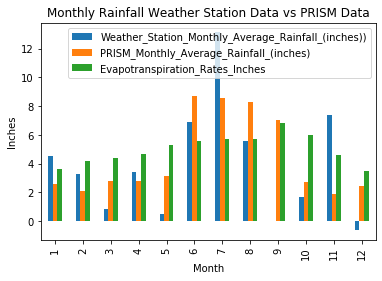

In [34]:
#I added the ET rates to the monthly rainfall dataframe for the graphs
extracted_col3 = evapotranspirationdf['Evapotranspiration_Rates_Inches'].tolist()
comparedf['Evapotranspiration_Rates_Inches']=extracted_col3
ax = comparedf.plot.bar()

ax.set_xlabel('Month')
ax.set_ylabel('Inches')
ax.set_title('Monthly Rainfall Weather Station Data vs PRISM Data')

plt.show()

Text(0.5, 1.0, 'Monthly Rainfall Weather Station Data vs PRISM Data')

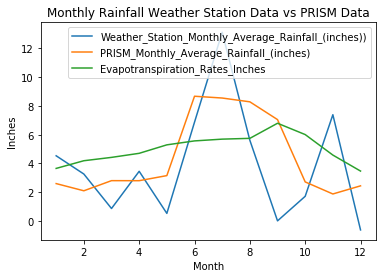

In [35]:
ay= comparedf.plot()
ay.set_xlabel('Month')
ay.set_ylabel('Inches')
ay.set_title('Monthly Rainfall Weather Station Data vs PRISM Data')

In [36]:
comparedf

,Weather_Station_Monthly_Average_Rainfall_(inches)),PRISM_Monthly_Average_Rainfall_(inches),Evapotranspiration_Rates_Inches
1,4.53,2.594667,3.651425
2,3.26,2.094333,4.185898
3,0.86,2.799333,4.419023
4,3.45,2.796333,4.701800
5,0.52,3.150333,5.291339
6,6.87,8.675667,5.565901
7,13.13,8.550667,5.689050
8,5.61,8.286333,5.743957
9,0.00,7.049000,6.795259
10,1.71,2.711000,6.007238


#### 3.	The rates of evapotranspiration (ET) seemed to have less variance overall throughout the year. It should be noted that the highest rates of evapotranspiration occurred during the summer months. ET seemed to be almost always be within around 2 inches of the rainfall rates recorded by the PRISM data. The rate of ET was consistently greater than the rate of rainfall, with the exception of the Summer months, where the rainfall exceeded the rates of ET consistently. 

### Annual ET Compared to Rainfall

In [37]:
#Annual ET Compared to Rainfall
#First I must find the average yearly rainfall from the prism data.
#I can not take average of averages so I will find the total rainfall per year
#and find the average annual rainfall for the 30 year period
# prismdf

In [38]:
#Finding average annual rainfall per year
prismyearly=prismdf.groupby(prismdf['Year']).sum()
# display(prismyearly.head())
prismyearly.drop("tmean (degrees F)", axis=1, inplace=True)
prismyearly.drop("Celsius", axis=1, inplace=True)

,Total Annual Inches
Prism Mean Annual,51.307097
Weather Station Annual Total,46.700000
Evapotranspiration Annual Total,60.097567


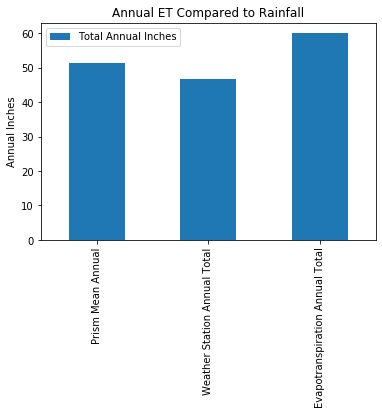

In [39]:
#Finding overall average annual rainfall over 30 year PRISM data
# display(prismyearly.mean())
prismmeanannual=prismyearly['ppt (inches)'].mean()

#annual rainfall weather station date
weatherannual=totalmonthlyraindf['Rainfall_(inches)'].sum()

#ET annual total
etannual=evapotranspirationdf['Evapotranspiration_Rates_Inches'].sum()
# print(etannual)
# prismmeanannual.plot.bar()
etcompare={"Total Annual Inches":[prismmeanannual,weatherannual,etannual]}

etcomparedf=pd.DataFrame(etcompare, index=['Prism Mean Annual','Weather Station Annual Total','Evapotranspiration Annual Total'])
display(etcomparedf)
et = etcomparedf.plot.bar()

et.set_xlabel(None)
et.set_ylabel('Annual Inches')
et.set_title('Annual ET Compared to Rainfall')

plt.show()

#### Over the course of the year, the total ET (60 in) was slightly greater than the amount of annual rainfall (51 in from the PRISM data, and 46.7 in from the weather station), but the rates were not too far off from each other.


## Monthly Average Leachate Per Day 2020

In [40]:
malpdgal={'Month':['January','Feburary','March','April','May','June','July','August','September','October','November','December'],
          'Daily_Leachate_Gallons':[103672,86388,78757,75974,56107,72425,60196,61448,83906,106128,124776,203145]
}

In [41]:
malpdgaldf=pd.DataFrame(malpdgal, index=[1,2,3,4,5,6,7,8,9,10,11,12])
malpdgaldf

,Month,Daily_Leachate_Gallons
1,January,103672
2,Feburary,86388
3,March,78757
4,April,75974
5,May,56107
6,June,72425
7,July,60196
8,August,61448
9,September,83906
10,October,106128


In [42]:
malpdmdf=malpdgaldf.assign(Daily_Leachate_m3 = lambda x: (0.00378541)*x ['Daily_Leachate_Gallons'])
malpdmdf.drop("Daily_Leachate_Gallons", axis=1, inplace=True)
malpdmdf

,Month,Daily_Leachate_m3
1,January,392.441026
2,Feburary,327.013999
3,March,298.127535
4,April,287.592739
5,May,212.387999
6,June,274.158319
7,July,227.866540
8,August,232.605874
9,September,317.618611
10,October,401.737992


Text(0.5, 1.0, 'Average Leachate Per Month m^3/day')

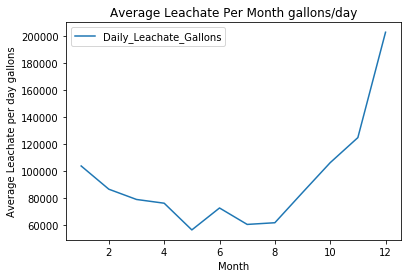

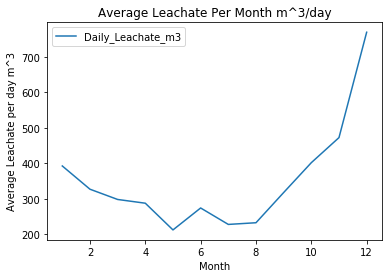

In [43]:
y= malpdgaldf.plot()
y.set_xlabel('Month')
y.set_ylabel('Average Leachate per day gallons')
y.set_title('Average Leachate Per Month gallons/day')

z= malpdmdf.plot()
z.set_xlabel('Month')
z.set_ylabel('Average Leachate per day m^3')
z.set_title('Average Leachate Per Month m^3/day')

# Water Balance

In [44]:
#Adding the Monthly Average Rainfall, Evapotranspiration, and Leachate into one dataframe for the total Water Balance
extracted_col_mean_monthly_rainfall = prism_month_mean['ppt_(inches)'].tolist()
extracted_col_ET=evapotranspirationdf['Evapotranspiration_Rates_Inches'].tolist()

#area of landfill is in acres
area=162.4 #acres
#converting inches to volume (gallons)
#1 acre=43560ft^2
#1ft^3=7.48gallons
#1 in of rainfall over one acre is 3,630 ft^3
#1 in of rainfall over one acre is 22,650 gallons
print(extracted_col_mean_monthly_rainfall)
print(sum(extracted_col_mean_monthly_rainfall))
extracted_col_mean_monthly_rainfall_gallons = [(i)*area*22650 for i in extracted_col_mean_monthly_rainfall]

#Making ET and Leachate values negative to represent outflow
extracted_col_ET_gallons = [-(i)*22650*area for i in extracted_col_ET]

Daily_Leachate_Gallons=[103672,86388,78757,75974,56107,72425,60196,61448,83906,106128,124776,203145]

Daily_Leachate_Gallons = [-i for i in Daily_Leachate_Gallons]

[2.5946666666666656, 2.0943333333333336, 2.799333333333332, 2.7963333333333336, 3.150333333333334, 8.675666666666656, 8.550666666666668, 8.28633333333334, 7.049000000000001, 2.7110000000000003, 1.8716666666666677, 2.4380000000000006]
53.01733333333333


In [45]:
waterbalancedf=pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12])
waterbalancedf['Mean_Monthly_Rainfall_Gallons']=extracted_col_mean_monthly_rainfall_gallons
waterbalancedf['Mean_Monthly_Evapotranspiration_Gallons']=extracted_col_ET_gallons
waterbalancedf['Mean_Monthly_Leachate_Gallons']=Daily_Leachate_Gallons
display(waterbalancedf)

,Mean_Monthly_Rainfall_Gallons,Mean_Monthly_Evapotranspiration_Gallons,Mean_Monthly_Leachate_Gallons
1,9544118.08,-1.343125e+07,-103672
2,7703711.96,-1.539724e+07,-86388
3,10296955.76,-1.625476e+07,-78757
4,10285920.68,-1.729491e+07,-75974
5,11588060.12,-1.946345e+07,-56107
6,31912225.24,-2.047339e+07,-72425
7,31452430.24,-2.092637e+07,-60196
8,30480117.08,-2.112834e+07,-61448
9,25928759.64,-2.499541e+07,-83906
10,9972033.96,-2.209678e+07,-106128


In [46]:
waterbalancedf['Monthly_Change_in_Storage']=waterbalancedf.sum(axis=1)
display(waterbalancedf)
print("Average Change in Storage per Month  " + str(waterbalancedf['Monthly_Change_in_Storage'].mean())+" Gallons")
print("Total Annual Change in Storage  " + str(waterbalancedf['Monthly_Change_in_Storage'].sum())+" Gallons")

,Mean_Monthly_Rainfall_Gallons,Mean_Monthly_Evapotranspiration_Gallons,Mean_Monthly_Leachate_Gallons,Monthly_Change_in_Storage
1,9544118.08,-1.343125e+07,-103672,-3.990809e+06
2,7703711.96,-1.539724e+07,-86388,-7.779917e+06
3,10296955.76,-1.625476e+07,-78757,-6.036558e+06
4,10285920.68,-1.729491e+07,-75974,-7.084968e+06
5,11588060.12,-1.946345e+07,-56107,-7.931496e+06
6,31912225.24,-2.047339e+07,-72425,1.136641e+07
7,31452430.24,-2.092637e+07,-60196,1.046586e+07
8,30480117.08,-2.112834e+07,-61448,9.290328e+06
9,25928759.64,-2.499541e+07,-83906,8.494439e+05
10,9972033.96,-2.209678e+07,-106128,-1.223088e+07


Average Change in Storage per Month  -2263047.397943089 Gallons
Total Annual Change in Storage  -27156568.775317065 Gallons


To find the average monthly change in storage I subtracted the outputs (ET and leachate) from the input (Rainfall). According to the data the landfill should be losing more water throughout the year than is input through rainfall. I suspect there might be missing inputs into the system, such as water infiltration from ground water, or an input of liquids from the solids added to the landfill as well.

In [47]:
#Infiltration rate averaged from the 7 measurements across the landfill
#units are in in/hr
from statistics import mean 
infiltration=[0.08,0.5,7.8,0.08,1.1,3.7,6.3]
meaninfiltrationinhr=mean(infiltration)
print(meaninfiltrationinhr)
meaninfiltrationinday=meaninfiltrationinhr*24
print(meaninfiltrationinday)
#Converting to acre-ft
meaninfiltrationacreftday=(meaninfiltrationinday/12)
#multiplying by area and the days in each month to find monthly values
months=[31,28,31,30,31,30,31,31,30,31,30,31]
meaninfiltrationmonthacreft = [-i*meaninfiltrationacreftday for i in months]
print(meaninfiltrationmonthacreft)
#converting other values to actre-ft
extracted_col_mean_monthly_rainfall_acreft = [(i/12) for i in extracted_col_mean_monthly_rainfall]
print(extracted_col_mean_monthly_rainfall_acreft)
print("^")
extracted_col_ET_acreft = [-(i/12)  for i in extracted_col_ET]
Daily_Leachate_acreft = [i*0.000003069 for i in Daily_Leachate_Gallons]
#making new dataframe for new water balance in acre-ft with groundwater infiltration
newwaterbalancedf=pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12])
newwaterbalancedf['Mean_Monthly_Rainfall_Acre-ft']=extracted_col_mean_monthly_rainfall_acreft
newwaterbalancedf['Mean_Monthly_Infiltration_Acre-ft']=meaninfiltrationmonthacreft
newwaterbalancedf['Mean_Monthly_Evapotranspiration_Acre-ft']=extracted_col_ET_acreft
newwaterbalancedf['Mean_Monthly_Leachate_Acre-ft']=Daily_Leachate_acreft

display(newwaterbalancedf)

2.7942857142857145
67.06285714285715
[-173.2457142857143, -156.48000000000005, -173.2457142857143, -167.6571428571429, -173.2457142857143, -167.6571428571429, -173.2457142857143, -173.2457142857143, -167.6571428571429, -173.2457142857143, -167.6571428571429, -173.2457142857143]
[0.21622222222222212, 0.1745277777777778, 0.23327777777777767, 0.2330277777777778, 0.26252777777777786, 0.7229722222222214, 0.7125555555555557, 0.6905277777777784, 0.5874166666666668, 0.22591666666666668, 0.15597222222222232, 0.20316666666666672]
^


,Mean_Monthly_Rainfall_Acre-ft,Mean_Monthly_Infiltration_Acre-ft,Mean_Monthly_Evapotranspiration_Acre-ft,Mean_Monthly_Leachate_Acre-ft
1,0.216222,-173.245714,-0.304285,-0.318169
2,0.174528,-156.480000,-0.348825,-0.265125
3,0.233278,-173.245714,-0.368252,-0.241705
4,0.233028,-167.657143,-0.391817,-0.233164
5,0.262528,-173.245714,-0.440945,-0.172192
6,0.722972,-167.657143,-0.463825,-0.222272
7,0.712556,-173.245714,-0.474088,-0.184742
8,0.690528,-173.245714,-0.478663,-0.188584
9,0.587417,-167.657143,-0.566272,-0.257508
10,0.225917,-173.245714,-0.500603,-0.325707


In [48]:
print(meaninfiltrationinhr)

2.7942857142857145


In [49]:
print(meaninfiltrationinday)

67.06285714285715


In [50]:
print(meaninfiltrationacreftday)

5.58857142857143


In [51]:
newwaterbalancedf['Inflow to the System acre-ft']=newwaterbalancedf.sum(axis=1)
newwaterbalancedf=newwaterbalancedf.assign(Inflow_to_the_System_mgd= lambda x:0.27132807313538*x['Inflow to the System acre-ft'])
newwaterbalancedf=newwaterbalancedf.assign(Inflow_to_the_System_cubic_meters_per_second= lambda x:0.01428*x['Inflow to the System acre-ft'])

display(newwaterbalancedf)
print("Monthly inflow  " + str(newwaterbalancedf['Inflow to the System acre-ft'].mean())+" Acre-ft")
print()
print("Monthly inflow  " + str(newwaterbalancedf['Inflow_to_the_System_mgd'].mean())+" mgd")
print()
print("Monthly inflow  " + str(newwaterbalancedf['Inflow_to_the_System_cubic_meters_per_second'].mean())+" m^3/s")


,Mean_Monthly_Rainfall_Acre-ft,Mean_Monthly_Infiltration_Acre-ft,Mean_Monthly_Evapotranspiration_Acre-ft,Mean_Monthly_Leachate_Acre-ft,Inflow to the System acre-ft,Inflow_to_the_System_mgd,Inflow_to_the_System_cubic_meters_per_second
1,0.216222,-173.245714,-0.304285,-0.318169,-173.651947,-47.116648,-2.479750
2,0.174528,-156.480000,-0.348825,-0.265125,-156.919422,-42.576644,-2.240809
3,0.233278,-173.245714,-0.368252,-0.241705,-173.622394,-47.108630,-2.479328
4,0.233028,-167.657143,-0.391817,-0.233164,-168.049096,-45.596437,-2.399741
5,0.262528,-173.245714,-0.440945,-0.172192,-173.596324,-47.101556,-2.478956
6,0.722972,-167.657143,-0.463825,-0.222272,-167.620268,-45.480084,-2.393617
7,0.712556,-173.245714,-0.474088,-0.184742,-173.191988,-46.991848,-2.473182
8,0.690528,-173.245714,-0.478663,-0.188584,-173.222433,-47.000109,-2.473616
9,0.587417,-167.657143,-0.566272,-0.257508,-167.893505,-45.554221,-2.397519
10,0.225917,-173.245714,-0.500603,-0.325707,-173.846108,-47.169329,-2.482522


Monthly inflow  -170.3195123736686 Acre-ft

Monthly inflow  -46.212465109705 mgd

Monthly inflow  -2.4321626366959874 m^3/s


According to the data with the inclusion of the infiltration of the water leaving the landfill, there would be an outflow of around 19346.61628069542 m^3/s or 367596.6468578893 mgd. The negative values in the table represent flow out of the system.

# ---------------------------------------------------------------------------------------------------------------
# Homework 3
# ---------------------------------------------------------------------------------------------------------------

In [52]:
#I am finding the average daily values from the prism data for one year

## Prism Daily Values regardless of Year

In [53]:
#Grouping the PRISM data to find Daily Summary Statistics for Each Year
#This will give me daily precipitation values for the dynamic water balance

prism_day_by_year_mean=prismdf.groupby(['Month', 'Day']).mean()

prism_day_by_year_mean=prism_day_by_year_mean.assign(Daily_Rainfall_meters = lambda x: (0.0254)*x['ppt (inches)'])


In [54]:
print("_________________________________________________________________________________________________")
print("")
print("")
print("PRISM Daily Mean Values")
print("_________________")
print(" ")
display(prism_day_by_year_mean)
print("_________________________________________________________________________________________________")
print("")
print("")
print("")



_________________________________________________________________________________________________


PRISM Daily Mean Values
_________________
 


ppt (inches)  tmean (degrees F)    Celsius  Daily_Rainfall_meters
Month Day                                                                   
01    01       0.181000          63.586667  17.548148               0.004597
      02       0.114000          64.026667  17.792593               0.002896
      03       0.114000          63.843333  17.690741               0.002896
      04       0.057667          59.853333  15.474074               0.001465
      05       0.044000          58.010000  14.450000               0.001118
...                 ...                ...        ...                    ...
12    27       0.087000          59.296667  15.164815               0.002210
      28       0.029000          60.636667  15.909259               0.000737
      29       0.033667          61.820000  16.566667               0.000855
      30       0.035333          62.256667  16.809259               0.000897
      31       0.037667          61.426667  16.348148               0.000957

[366 rows x 4 columns]

_________________________________________________________________________________________________





## Leachate entering treatment area

In [55]:
#Leachate entering the treatment area in m^3 and m
#1 m^3 = 0.0001 m/heactare
#10 heactares
#malpdmdf stands for "monthly average leachate per day meters dataframe"

malpdmdf=malpdmdf.assign(Daily_Leachate_m = lambda x: (0.00001)*x ['Daily_Leachate_m3'])

display(malpdmdf)


,Month,Daily_Leachate_m3,Daily_Leachate_m
1,January,392.441026,0.003924
2,Feburary,327.013999,0.003270
3,March,298.127535,0.002981
4,April,287.592739,0.002876
5,May,212.387999,0.002124
6,June,274.158319,0.002742
7,July,227.866540,0.002279
8,August,232.605874,0.002326
9,September,317.618611,0.003176
10,October,401.737992,0.004017


## Evapotranspiration from treatment area

In [56]:
evapotranspirationdf

,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Evapotranspiration Rates (mm/month),Evapotranspiration_Rates_Inches
Month,,,,
1,16.187948,16.623355,92.746189,3.651425
2,19.770503,19.461640,106.321816,4.185898
3,21.369269,21.776432,112.243180,4.419023
4,23.081080,23.336574,119.425730,4.701800
5,26.403420,27.336171,134.400003,5.291339
6,27.789954,29.896296,141.373895,5.565901
7,28.347655,31.759110,144.501871,5.689050
8,28.584210,32.626263,145.896506,5.743957
9,32.722222,41.666667,172.599585,6.795259


In [57]:
evapotranspirationdf=evapotranspirationdf.assign(Evapotranspiration_Rate_m_per_month = lambda x: (0.00001)*x ['Evapotranspiration Rates (mm/month)'])
display(evapotranspirationdf)

,Outdoor_Temperature_Celsius,Heat_Index_Celsius,Evapotranspiration Rates (mm/month),Evapotranspiration_Rates_Inches,Evapotranspiration_Rate_m_per_month
Month,,,,,
1,16.187948,16.623355,92.746189,3.651425,0.000927
2,19.770503,19.461640,106.321816,4.185898,0.001063
3,21.369269,21.776432,112.243180,4.419023,0.001122
4,23.081080,23.336574,119.425730,4.701800,0.001194
5,26.403420,27.336171,134.400003,5.291339,0.001344
6,27.789954,29.896296,141.373895,5.565901,0.001414
7,28.347655,31.759110,144.501871,5.689050,0.001445
8,28.584210,32.626263,145.896506,5.743957,0.001459
9,32.722222,41.666667,172.599585,6.795259,0.001726


### Combining my data for the dynamic water balance into one DataFrame

In [58]:
#I made a function to convert lists of daily averages per month so that they are the same length as the daily value lists
def yearlist(list):
    newlist=[]
    newlist.extend([list[0]]*31)
    newlist.extend([list[1]]*29)
    newlist.extend([list[2]]*31)
    newlist.extend([list[3]]*30)
    newlist.extend([list[4]]*31)
    newlist.extend([list[5]]*30)
    newlist.extend([list[6]]*31)
    newlist.extend([list[7]]*31)
    newlist.extend([list[8]]*30)
    newlist.extend([list[9]]*31)
    newlist.extend([list[10]]*30)
    newlist.extend([list[11]]*31)
    return newlist



In [59]:
#Making the new dataframe
dynamicwaterbalancedf=prism_day_by_year_mean.copy()
# Dropping unneeded columns
cols4=[0,1,2]
dynamicwaterbalancedf.drop(dynamicwaterbalancedf.columns[cols4], axis=1, inplace=True)
display(dynamicwaterbalancedf)

Daily_Rainfall_meters
Month Day                       
01    01                0.004597
      02                0.002896
      03                0.002896
      04                0.001465
      05                0.001118
...                          ...
12    27                0.002210
      28                0.000737
      29                0.000855
      30                0.000897
      31                0.000957

[366 rows x 1 columns]

In [60]:
#changing my monthly lists so that they have the same length as the daily dataframe
leachatem3month=malpdmdf['Daily_Leachate_m3'].tolist()

leachatem3 = yearlist(leachatem3month)

leachatemmonth=malpdmdf['Daily_Leachate_m'].tolist()
leachatem = yearlist (leachatemmonth)


#making my ET values negative to represent outflow from the system

evapotranspirationmmonth=evapotranspirationdf['Evapotranspiration_Rate_m_per_month'].tolist()
evapotranspirationm = yearlist(evapotranspirationmmonth)
evapotranspirationm = [-i for i in evapotranspirationm]
#Checking to make sure the length is compatible
len(evapotranspirationm)

366

In [61]:
#Adding my lists into my DataFrame

dynamicwaterbalancedf['Leachate_meters']=leachatem

dynamicwaterbalancedf['ET_meters']=evapotranspirationm

display(dynamicwaterbalancedf)

Daily_Rainfall_meters  Leachate_meters  ET_meters
Month Day                                                   
01    01                0.004597         0.003924  -0.000927
      02                0.002896         0.003924  -0.000927
      03                0.002896         0.003924  -0.000927
      04                0.001465         0.003924  -0.000927
      05                0.001118         0.003924  -0.000927
...                          ...              ...        ...
12    27                0.002210         0.007690  -0.000881
      28                0.000737         0.007690  -0.000881
      29                0.000855         0.007690  -0.000881
      30                0.000897         0.007690  -0.000881
      31                0.000957         0.007690  -0.000881

[366 rows x 3 columns]

In [62]:
#I made a function to find the change in height based on the equations given in the homework

#I choose to exclude the outflow so that I could determine later how much outflow would be neeeded

def delta_h_fn(P,qin,ET):
    delta_h=P+qin+ET
    return delta_h
dynamicwaterbalancedf['Delta_h']=dynamicwaterbalancedf.apply(lambda x: delta_h_fn(x['Daily_Rainfall_meters'], x['Leachate_meters'], x['ET_meters']), axis=1)
dynamicwaterbalancedf

Daily_Rainfall_meters  Leachate_meters  ET_meters   Delta_h
Month Day                                                             
01    01                0.004597         0.003924  -0.000927  0.007594
      02                0.002896         0.003924  -0.000927  0.005893
      03                0.002896         0.003924  -0.000927  0.005893
      04                0.001465         0.003924  -0.000927  0.004462
      05                0.001118         0.003924  -0.000927  0.004115
...                          ...              ...        ...       ...
12    27                0.002210         0.007690  -0.000881  0.009019
      28                0.000737         0.007690  -0.000881  0.007546
      29                0.000855         0.007690  -0.000881  0.007664
      30                0.000897         0.007690  -0.000881  0.007707
      31                0.000957         0.007690  -0.000881  0.007766

[366 rows x 4 columns]

In [63]:
#Finding the height by adding the delta h value to the previous delta h and finding the cumulative value

dynamicwaterbalancedf['h'] = dynamicwaterbalancedf['Delta_h'].cumsum()
dynamicwaterbalancedf

Daily_Rainfall_meters  Leachate_meters  ET_meters   Delta_h  \
Month Day                                                                
01    01                0.004597         0.003924  -0.000927  0.007594   
      02                0.002896         0.003924  -0.000927  0.005893   
      03                0.002896         0.003924  -0.000927  0.005893   
      04                0.001465         0.003924  -0.000927  0.004462   
      05                0.001118         0.003924  -0.000927  0.004115   
...                          ...              ...        ...       ...   
12    27                0.002210         0.007690  -0.000881  0.009019   
      28                0.000737         0.007690  -0.000881  0.007546   
      29                0.000855         0.007690  -0.000881  0.007664   
      30                0.000897         0.007690  -0.000881  0.007707   
      31                0.000957         0.007690  -0.000881  0.007766   

                  h  
Month Day            
01    01   0.007594  
      02   0.013487  
      03   0.019379  
      04   0.023841  
      05   0.027956  
...             ...  
12    27   2.136394  
      28   2.143940  
      29   2.151605  
      30   2.159312  
      31   2.167078  

[366 rows x 5 columns]

In [64]:
finaldynamicwaterbalancedf2=dynamicwaterbalancedf.copy()
finaldynamicwaterbalancedf2['q_out']=0
finaldynamicwaterbalancedf2

Daily_Rainfall_meters  Leachate_meters  ET_meters   Delta_h  \
Month Day                                                                
01    01                0.004597         0.003924  -0.000927  0.007594   
      02                0.002896         0.003924  -0.000927  0.005893   
      03                0.002896         0.003924  -0.000927  0.005893   
      04                0.001465         0.003924  -0.000927  0.004462   
      05                0.001118         0.003924  -0.000927  0.004115   
...                          ...              ...        ...       ...   
12    27                0.002210         0.007690  -0.000881  0.009019   
      28                0.000737         0.007690  -0.000881  0.007546   
      29                0.000855         0.007690  -0.000881  0.007664   
      30                0.000897         0.007690  -0.000881  0.007707   
      31                0.000957         0.007690  -0.000881  0.007766   

                  h  q_out  
Month Day                   
01    01   0.007594      0  
      02   0.013487      0  
      03   0.019379      0  
      04   0.023841      0  
      05   0.027956      0  
...             ...    ...  
12    27   2.136394      0  
      28   2.143940      0  
      29   2.151605      0  
      30   2.159312      0  
      31   2.167078      0  

[366 rows x 6 columns]

In [65]:
display(finaldynamicwaterbalancedf2.iloc[2,0])

0.0028956

In [66]:
#This loop determines the q out based on the height
#the j value adjusts the q value when h is within range if set to .1 the level is held very consistently
#I choose to set it at .022 so that the water level could gradually fluctuate through the year between .1 and .5
#while still averaging in the middle
j=.022
n=0
m=0
#Setting the initil height as ho
ho=.2
while n < 366:
    #i realized that since my q_out is based on previous conditions, there is a chance that the addition of 
    #the q_out value can still drop the h below .1 so I have added m as a backup check
    if m==0:
        #setting the initial condition for h0 as zero for h1=h0+delta_h
        if n==0:
            finaldynamicwaterbalancedf2.iloc[n,4]=ho
            #checking first days height to make sure delta_h was within the correct parameters
            #if less than lower limit, no outflow
            if finaldynamicwaterbalancedf2.iloc[n,4]<=0.1:
                finaldynamicwaterbalancedf2.iloc[n,5]=0
            #if within range, the outflow is half of the distance to the lower limit    
            elif .1<= finaldynamicwaterbalancedf2.iloc[n,4] <=0.5:
                finaldynamicwaterbalancedf2.iloc[n,5]=-1*(j*(finaldynamicwaterbalancedf2.iloc[n,4]-.11))
            #if above range, the outflow reduces height to the midway point .3
            elif finaldynamicwaterbalancedf2.iloc[n,4]>=0.5:
                finaldynamicwaterbalancedf2.iloc[n,5]=-1*(finaldynamicwaterbalancedf2.iloc[n,4]-0.49)
            #delta h is recalculated with the new outflow
            finaldynamicwaterbalancedf2.iloc[n,3]=finaldynamicwaterbalancedf2.iloc[n,0]+finaldynamicwaterbalancedf2.iloc[n,1] + finaldynamicwaterbalancedf2.iloc[n,2]+finaldynamicwaterbalancedf2.iloc[n,5]
            #The first days height is equal to delta_h beause the previous days starting height is 0
            finaldynamicwaterbalancedf2.iloc[n,4] = finaldynamicwaterbalancedf2.iloc[n,3]+ho

        #for days that arent the first day    
        else:
            #setting starting conditions to find correct outflow
            #del_h is calculated excluding outflow
            finaldynamicwaterbalancedf2.iloc[n,3]=finaldynamicwaterbalancedf2.iloc[n,0]+finaldynamicwaterbalancedf2.iloc[n,1] + finaldynamicwaterbalancedf2.iloc[n,2]
            #h is found from delta_h
            finaldynamicwaterbalancedf2.iloc[n,4] = finaldynamicwaterbalancedf2.iloc[n-1,4] + finaldynamicwaterbalancedf2.iloc[n,3]
            #finding the proper outflow to maintain h within range .1 to .5 m
            if finaldynamicwaterbalancedf2.iloc[n,4]<=0.1:
                finaldynamicwaterbalancedf2.iloc[n,5]=0
            #if within range, the outflow is half of the distance to the lower limit      
            elif .1<= finaldynamicwaterbalancedf2.iloc[n,4] <=0.5:
                finaldynamicwaterbalancedf2.iloc[n,5]=-1*(j*(finaldynamicwaterbalancedf2.iloc[n,4]-.11))
            #if above range, the outflow reduces height to the midway point .3
            elif finaldynamicwaterbalancedf2.iloc[n,4]>=0.5:
                finaldynamicwaterbalancedf2.iloc[n,5]=-1*(finaldynamicwaterbalancedf2.iloc[n,4]-0.49)
            #delta h is recalculated with the new outflow
            finaldynamicwaterbalancedf2.iloc[n,3]=finaldynamicwaterbalancedf2.iloc[n,0]+finaldynamicwaterbalancedf2.iloc[n,1] + finaldynamicwaterbalancedf2.iloc[n,2]+finaldynamicwaterbalancedf2.iloc[n,5]
            #h is recalculated with new delta_h which considers outflow
            finaldynamicwaterbalancedf2.iloc[n,4] = finaldynamicwaterbalancedf2.iloc[n-1,4] + finaldynamicwaterbalancedf2.iloc[n,3]
        if finaldynamicwaterbalancedf2.iloc[n,4] <= 0.1:
            if n==0:
                n+=1
                m=0
            else:
                m=1
                n=n
        else:
            n+=1
    else:
        #if this condition is met, then the added outflow dropped h below the lower limit so q_out is set to zero
        finaldynamicwaterbalancedf2.iloc[n,5]=0
        #delta h is recalculated with the new outflow
        finaldynamicwaterbalancedf2.iloc[n,3]=finaldynamicwaterbalancedf2.iloc[n,0]+finaldynamicwaterbalancedf2.iloc[n,1] + finaldynamicwaterbalancedf2.iloc[n,2]+finaldynamicwaterbalancedf2.iloc[n,5]
        #h is recalculated with new delta_h which considers outflow
        finaldynamicwaterbalancedf2.iloc[n,4] = finaldynamicwaterbalancedf2.iloc[n-1,4] + finaldynamicwaterbalancedf2.iloc[n,3]
        #resets the m condition and moves to the next index
        m=0
        n+=1
    
# finaldynamicwaterbalancedf2.head(50) 

In [67]:
# finaldynamicwaterbalancedf2.head(50)

In [68]:
print("h")
print('max')
print(finaldynamicwaterbalancedf2['h'].max())
print("min")
print(finaldynamicwaterbalancedf2['h'].min())
print("mean")
print(finaldynamicwaterbalancedf2['h'].mean())
print("std")
print(finaldynamicwaterbalancedf2['h'].std())
print('')
print("Delta_h")
print('max')
print(finaldynamicwaterbalancedf2['Delta_h'].max())
print("min")
print(finaldynamicwaterbalancedf2['Delta_h'].min())
print("mean")
print(finaldynamicwaterbalancedf2['Delta_h'].mean())
print("std")
print(finaldynamicwaterbalancedf2['Delta_h'].std())
print("-------------------------------------")
print("q_out")
print('max')
print(finaldynamicwaterbalancedf2['q_out'].max())
print("min")
print(finaldynamicwaterbalancedf2['q_out'].min())
print("mean")
print(finaldynamicwaterbalancedf2['q_out'].mean())
print("std")
print(finaldynamicwaterbalancedf2['q_out'].std())

h
max
0.4419197906161715
min
0.20561434836336956
mean
0.3454296725913024
std
0.06946494495074723

Delta_h
max
0.00964678558706402
min
-0.003990104227843777
mean
0.0006254800034445208
std
0.0021577506708321836
-------------------------------------
q_out
max
-0.00198
min
-0.00746649835741899
mean
-0.005295497245524978
std
0.0015635733814553191


In [69]:
# finaldynamicwaterbalancedf2.head()

Text(0.5, 1.0, 'Depth variation vs Time')

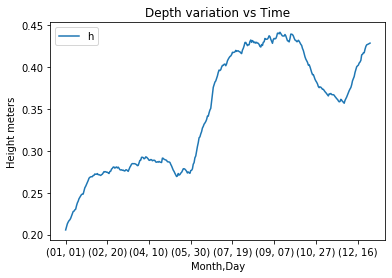

In [70]:
finaldynamicwaterbalancedgraphdf=finaldynamicwaterbalancedf2.copy()

cols7=[0,1,2,3,5]
finaldynamicwaterbalancedgraphdf.drop(finaldynamicwaterbalancedgraphdf.columns[cols7], axis=1, inplace=True)
finaldynamicwaterbalancedgraphdf
# finaldynamicwaterbalancedgraphdf.plot()
aa= finaldynamicwaterbalancedgraphdf.plot()

aa.set_ylabel('Height meters')

aa.set_title('Depth variation vs Time')

In [71]:
finaldynamicwaterbalancedgraphdf

h
Month Day          
01    01   0.205614
      02   0.209274
      03   0.212853
      04   0.214953
      05   0.216668
...             ...
12    27   0.426863
      28   0.427272
      29   0.427788
      30   0.428334
      31   0.428926

[366 rows x 1 columns]

# Q4

# Question 4


In [72]:
pilotdf = pd.read_excel('Updated-CWs for landfill leachate.xlsx', sheet_name = 2, header=2)

display(pilotdf.head())


,Unnamed: 0,Hydraulic Retention,Q,q,pH,Unnamed: 5,Alkalinity (mg/L as CaCO₃ ),Unnamed: 7,Conductivity (µS/cm),Unnamed: 9,...,Color as UV 456 absorbence,Unnamed: 13,NH₄⁺-N (mg/L),Unnamed: 15,Free NH₄⁺-N (mg/L),Unnamed: 17,NO₂⁻-N (mg/L),Unnamed: 19,NO₃⁻-N (mg/L),Unnamed: 21
0,Time (d),days,L/d,cm/d,In,Out,In,Out,In,Out,...,In,Out,In,Out,In,Out,In,Out,In,Out
1,54,7,24,2.18,8.63,8.475,1035,775,17.045,13.175,...,0.12,0.082,237.378,138.408,46.236,20.0383,0.442435,0,25.0118,26.1288
2,60,7,24,2.18,8.22,8.26,1320,1020,17.24,14.43,...,0.112,0.082,234.972,165.485,20.2106,15.4787,32.5438,17.0244,16.9638,9.2108
3,68,7,24,2.18,8.18,8.26,1430,940,17.92,17.21,...,0.097,0.095,265.492,149.589,20.9852,13.9918,37.0773,39.2408,8.70153,15.1417
4,88,7,24,2.18,7.84,7.785,650,420,12.5,8.545,...,0.074,0.046,125.968,51.5713,4.75525,1.72306,23.6211,12.4288,29.8639,31.6822


In [73]:
pilotdf=pilotdf[0:39]
#removing spaces and ':' to make indexing easier
pilotdf.columns = [c.replace(' ', '_') for c in pilotdf.columns]
pilotdf.columns = [c.replace(':', '') for c in pilotdf.columns]
# pilotdf.info()
pilotdf.drop(0, inplace=True)

In [74]:
# Dropping unneeded columns
neededpilotdatadf=pilotdf.copy()
neededpilotdatadf['CODin mg/L']=neededpilotdatadf['sCOD_(mg/L)']
neededpilotdatadf['NH4+-N mg/L']=neededpilotdatadf['NH₄⁺-N_(mg/L)']
neededpilotdatadf['NO2- -N mg/L']=neededpilotdatadf['NO₂⁻-N_(mg/L)']
neededpilotdatadf['NO3- -N mg/L']=neededpilotdatadf['NO₃⁻-N_(mg/L)']

# neededpilotdatadf.info()

cols5=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
neededpilotdatadf.drop(neededpilotdatadf.columns[cols5], axis=1, inplace=True)
# neededpilotdatadf

In [75]:
#making a dataframe of given parameters
data={ 'Pollutants':['COD','TN','NH4-N','NOx-N'],
      'Cout':[11.,2.,1.,1.],
      'Cstar':[10.,1.,0.,0.],
      'k':[86,8.4,14.7,26.5]
     }
parametersdf=pd.DataFrame(data)
# parametersdf


In [76]:
#adding Cin to my dataframe
Cinlist=[]
Cinlist.append(neededpilotdatadf['CODin mg/L'].mean())
#Total N was given in spreadsheet as 231
Cinlist.append(231)
#adding the 'NH4+-N mg/L' to the 'Free NH4+-N mg/L'
Cinlist.append(neededpilotdatadf['NH4+-N mg/L'].mean())
#Adding NO2 to No3 to get total NOx
Cinlist.append(neededpilotdatadf['NO2- -N mg/L'].mean()+neededpilotdatadf['NO3- -N mg/L'].mean())

Cinlist



[419.8529411764706, 231, 192.33106280701753, 80.01832819298245]

In [77]:
parametersdf['Cin_']=Cinlist
# parametersdf.info()

In [78]:
parametersdf['Cout'] = parametersdf['Cout'].astype(int)
parametersdf['Cstar'] = parametersdf['Cstar'].astype(int)
parametersdf['k'] = parametersdf['k'].astype(int)
parametersdf['Cin_'] = parametersdf['Cin_'].astype(int)
# weatherdf['Month'] = weatherdf['Month'].astype(int)
# weatherdf['Day'] = weatherdf['Day'].astype(int)
parametersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pollutants  4 non-null      object
 1   Cout        4 non-null      int32 
 2   Cstar       4 non-null      int32 
 3   k           4 non-null      int32 
 4   Cin_        4 non-null      int32 
dtypes: int32(4), object(1)
memory usage: 224.0+ bytes


In [79]:
parametersdf

,Pollutants,Cout,Cstar,k,Cin_
0,COD,11,10,86,419
1,TN,2,1,8,231
2,NH4-N,1,0,14,192
3,NOx-N,1,0,26,80


In [80]:
# #defining my function to calculate q
import math
import numpy
def findq (Co, Ci, Cs, k):
    q=(k/3.)*((pow((Co-Cs)/(Ci-Cs),1/3.))/(1.-1*(pow((Co-Cs)/(Ci-Cs),1/3.))))
    return q

#adding q to my dataframe

parametersdf['q']=parametersdf.apply(lambda x: findq(x['Cout'], x['Cin_'], x['Cstar'], x['k']), axis=1)
parametersdf


,Pollutants,Cout,Cstar,k,Cin_,q
0,COD,11,10,86,419,4.463187
1,TN,2,1,8,231,0.520130
2,NH4-N,1,0,14,192,0.978542
3,NOx-N,1,0,26,80,2.619223


In [81]:
#Finding area from large Q from leachate in m^3/yr
# malpdmdf.info()
# Q=malpdmdf['Daily_Leachate_m3'].sum()
#above is daily averages per month. To sum for year I must first multiply each by the number of days in each month
findQdf=pd.DataFrame()
findQdf['Daily_Leachate_m3'] = malpdmdf['Daily_Leachate_m3']
# display (months)
findQdf['month']=months
# malpmm3 = monthly average leachate per month in m^3
findQdf['malpmm3']=findQdf['Daily_Leachate_m3']*findQdf['month']

Q=findQdf['malpmm3'].sum()
#this Q value is the average annual leachate found by adding each monthly leachate to find an annual value
display(findQdf)


,Daily_Leachate_m3,month,malpmm3
1,392.441026,31,12165.671791
2,327.013999,28,9156.391974
3,298.127535,31,9241.953596
4,287.592739,30,8627.782180
5,212.387999,31,6584.027965
6,274.158319,30,8224.749577
7,227.866540,31,7063.862751
8,232.605874,31,7210.782084
9,317.618611,30,9528.558344
10,401.737992,31,12453.877767


In [82]:
#Finding the area from q=Q/A
#A=Q/q
parametersdf['Area_m2']=Q/parametersdf['q']
parametersdf

,Pollutants,Cout,Cstar,k,Cin_,q,Area_m2
0,COD,11,10,86,419,4.463187,28738.681292
1,TN,2,1,8,231,0.520130,246604.051124
2,NH4-N,1,0,14,192,0.978542,131078.753396
3,NOx-N,1,0,26,80,2.619223,48971.053577


# Homework 4

## Q1

In [83]:
#Copying previous HW 3 dataframe to use for Q1 in HW4
pkcupdatedf=parametersdf.copy()

In [84]:
#changing Area to the previously found maximun area
#dropping previously found q_in because I will need to find new value later using new Qmin, Qmean, and Qmax
#renamming Cout to Targeted_Cout because I will shortly be finding new Cout values
#changing k units from m/yr to cm/d so they match with the units of q in cm/d
pkcupdatedf['k']=pkcupdatedf['k']*(100/365.0)
pkcupdatedf["Area_m2"]=parametersdf['Area_m2'].max()
pkcupdatedf.drop("q", axis=1, inplace=True)
pkcupdatedf.rename(columns = {'Cout':'Targeted_Cout', 'Cin_':'Cin', 'k':'k_cm/d'}, inplace = True)

# pkcupdatedf

In [85]:
display(findQdf)

,Daily_Leachate_m3,month,malpmm3
1,392.441026,31,12165.671791
2,327.013999,28,9156.391974
3,298.127535,31,9241.953596
4,287.592739,30,8627.782180
5,212.387999,31,6584.027965
6,274.158319,30,8224.749577
7,227.866540,31,7063.862751
8,232.605874,31,7210.782084
9,317.618611,30,9528.558344
10,401.737992,31,12453.877767


In [86]:
#Finding q_in from Leachate min, mean, and max using previously found maximum area
#qin=Q/Area

#Finding area from large Q from leachate in m^3/yr
# malpdmdf.info()
Qmin=findQdf['Daily_Leachate_m3'].min()*365
Qmax=findQdf['Daily_Leachate_m3'].max()*365
Qmean=findQdf['Daily_Leachate_m3'].mean()*365
pkcupdatedf['Qmin']=Qmin
pkcupdatedf['Qmax']=Qmax
pkcupdatedf['Qmean']=Qmean

#I kept the Q vaues in m^3/yr because it was most compatible with homework 3
#however I converted the units in the function to find qin in cm/d
def findqin(Q,A):
    qin=(Q/A)*(100/365.0)
    return qin
# pkcupdatedf['qin_min_cm/d']=pkcupdatedf['qin_min']* 100/365.0

pkcupdatedf['qin_min_cm/d']=pkcupdatedf.apply(lambda x: findqin(x['Qmin'], x['Area_m2']), axis=1)

pkcupdatedf['qin_max_cm/d']=pkcupdatedf.apply(lambda x: findqin(x['Qmax'], x['Area_m2']), axis=1)

pkcupdatedf['qin_mean_cm/d']=pkcupdatedf.apply(lambda x: findqin(x['Qmean'], x['Area_m2']), axis=1)

#parametersdf['q']=parametersdf.apply(lambda x: findq(x['Cout'], x['Cin_'], x['Cstar'], x['k']), axis=1)
display(pkcupdatedf)

#Finding the area from q=Q/A
#A=Q/q
# parametersdf['Area']=Q/parametersdf['q']
# parametersdf


,Pollutants,Targeted_Cout,Cstar,k_cm/d,Cin,Area_m2,Qmin,Qmax,Qmean,qin_min_cm/d,qin_max_cm/d,qin_mean_cm/d
0,COD,11,10,23.561644,419,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363
1,TN,2,1,2.191781,231,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363
2,NH4-N,1,0,3.835616,192,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363
3,NOx-N,1,0,7.123288,80,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363


In [87]:
#Defining new function to find Cout from other given values using equation from HW3
def findCout (Ci, Cs, k, q):
    Co= (pow(1.0+(k/(3.0*q)),-3.0)*(Ci-Cs))+ Cs
    return Co

pkcupdatedf['Co_min']=pkcupdatedf.apply(lambda x: findCout(x['Cin'], x['Cstar'], x['k_cm/d'], x['qin_min_cm/d']), axis=1)
pkcupdatedf['Co_max']=pkcupdatedf.apply(lambda x: findCout(x['Cin'], x['Cstar'], x['k_cm/d'], x['qin_max_cm/d']), axis=1)
pkcupdatedf['Co_mean']=pkcupdatedf.apply(lambda x: findCout(x['Cin'], x['Cstar'], x['k_cm/d'], x['qin_mean_cm/d']), axis=1)

#removal efficency calculated by 
#  % removal efficency = [(Cin-Cout)/Cin]*100
def percent_removal (Cin,Cout):
    percent_removal=((Cin-Cout)/Cin)*100
    return percent_removal
pkcupdatedf['percent_removal_min']=pkcupdatedf.apply(lambda x: percent_removal(x['Cin'], x['Co_min']), axis=1)
pkcupdatedf['percent_removal_max']=pkcupdatedf.apply(lambda x: percent_removal(x['Cin'], x['Co_max']), axis=1)
pkcupdatedf['percent_removal_mean']=pkcupdatedf.apply(lambda x: percent_removal(x['Cin'], x['Co_mean']), axis=1)


# def findq (Co, Ci, Cs, k):
#     q=(k/3.)*((pow((Co-Cs)/(Ci-Cs),1/3.))/(1.-1*(pow((Co-Cs)/(Ci-Cs),1/3.))))
#     return q

In [88]:
display (pkcupdatedf)
pkcupdatedf


,Pollutants,Targeted_Cout,Cstar,k_cm/d,Cin,Area_m2,Qmin,Qmax,Qmean,qin_min_cm/d,qin_max_cm/d,qin_mean_cm/d,Co_min,Co_max,Co_mean,percent_removal_min,percent_removal_max,percent_removal_mean
0,COD,11,10,23.561644,419,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,10.000522,10.022777,10.002308,97.613241,97.607929,97.612814
1,TN,2,1,2.191781,231,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,1.269712,7.156740,1.997560,99.450341,96.901844,99.135256
2,NH4-N,1,0,3.835616,192,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,0.048263,1.447317,0.193107,99.974863,99.246189,99.899423
3,NOx-N,1,0,7.123288,80,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,0.003431,0.125142,0.014479,99.995712,99.843573,99.981901


,Pollutants,Targeted_Cout,Cstar,k_cm/d,Cin,Area_m2,Qmin,Qmax,Qmean,qin_min_cm/d,qin_max_cm/d,qin_mean_cm/d,Co_min,Co_max,Co_mean,percent_removal_min,percent_removal_max,percent_removal_mean
0,COD,11,10,23.561644,419,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,10.000522,10.022777,10.002308,97.613241,97.607929,97.612814
1,TN,2,1,2.191781,231,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,1.269712,7.156740,1.997560,99.450341,96.901844,99.135256
2,NH4-N,1,0,3.835616,192,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,0.048263,1.447317,0.193107,99.974863,99.246189,99.899423
3,NOx-N,1,0,7.123288,80,246604.051124,77521.619588,280680.296774,128141.342902,0.086125,0.311831,0.142363,0.003431,0.125142,0.014479,99.995712,99.843573,99.981901
